In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
data = pd.read_csv('./gist-mldl24f-hw3/train.csv')

step1. sanity check

In [25]:
#결측값, 중복된 값 확인
df = pd.DataFrame(data)

print("결측값 개수:\n", df.isnull().sum())
print("중복값 확인:\n", df.duplicated())

df.head()

결측값 개수:
 id            0
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
class         0
price         0
dtype: int64
중복값 확인:
 0         False
1         False
2         False
3         False
4         False
          ...  
243533    False
243534    False
243535    False
243536    False
243537    False
Length: 243538, dtype: bool


,id,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,price
0,UVYA93,2022-02-11,Indigo,6E,2106,03:00,Delhi,02h 10m,non-stop,05:10,Kolkata,economy,6270
1,1Y6UUB,2022-02-11,AirAsia,I5,764,04:25,Delhi,10h 20m,1-stop,14:45,Bangalore,economy,7423
2,J62B2K,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,economy,5956
3,HW31QF,2022-02-11,AirAsia,I5,548,04:45,Delhi,02h 25m,non-stop,07:10,Kolkata,economy,6060
4,AI4BTM,2022-02-11,AirAsia,I5,548,04:45,Delhi,14h 20m,1-stop,19:05,Bangalore,economy,21343


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243538 entries, 0 to 243537
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       243538 non-null  int64  
 1   id               243538 non-null  object 
 2   date             243538 non-null  object 
 3   airline          243538 non-null  object 
 4   ch_code          243538 non-null  object 
 5   num_code         243538 non-null  int64  
 6   dep_time         243538 non-null  object 
 7   from             243538 non-null  object 
 8   time_taken       243534 non-null  float64
 9   stop             243538 non-null  object 
 10  arr_time         243538 non-null  object 
 11  to               243538 non-null  object 
 12  class            243538 non-null  object 
 13  price            243538 non-null  int64  
 14  dep_time_period  243538 non-null  object 
 15  arr_time_period  243538 non-null  object 
 16  stop_num         237527 non-null  floa

In [27]:
df.shape

(243538, 13)

In [28]:
df.dtypes

id            object
date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
class         object
price          int64
dtype: object

df.head를 통해 데이터의 예시를 확인하고, dtype을 통해 각 column의 타입을 확인하였다. 
time_taken는 datetime타입으로, date의 값이 수치형 데이터로 변환이 가능한 것과 , int 타입을 가지고 있는 num_code는 수치를 나타내는 값이 아닌 분류를 위한 값인 만큼 object타입으로 변환하는 것이 더 올바르다고 판단하여 세 데이터 colum의 타입을 바꾸고, 범주형 데이터와 수치형 데이터의 분석을 각각 진행하였다. 

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['num_code'] = df['num_code'].astype(str)

def convert_time_to_minutes(time_str):
    try:
        # 문자열에서 시간과 분을 추출
        hours, minutes = time_str.split('h')
        hours = float(hours.strip())  # 공백 제거 후 소수점 포함한 실수로 변환
        minutes = int(minutes.replace('m', '').strip())  # 'm' 제거 후 정수로 변환

        # 총 분 단위로 변환
        total_minutes = int(hours * 60) + minutes
        return total_minutes
    except ValueError:
        # 변환에 실패하면 0 반환 (기본값)
        return np.nan

# apply를 사용하여 모든 행에 변환 함수 적용
df['time_taken'] = df['time_taken'].apply(convert_time_to_minutes)



In [30]:
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M')
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M')

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'    # 아침
    elif 12 <= hour < 17:
        return 'Afternoon'  # 오후
    elif 17 <= hour < 21:
        return 'Evening'    # 저녁
    else:
        return 'Night'      # 밤

# 시간대를 범주형으로 추가
df['dep_time_period'] = df['dep_time'].dt.hour.apply(time_of_day)
df['arr_time_period'] = df['arr_time'].dt.hour.apply(time_of_day)


In [ ]:
df['stop_num'] = df['stop'].map({
    'non-stop': 0,
    '1-stop': 1,
    '2+-stop': 2
})
reference_date = pd.to_datetime('2022-02-11')
df['days_since'] = (pd.to_datetime(df['date']) - reference_date).dt.days

step2.eda

In [32]:
df.describe()

,date,dep_time,time_taken,arr_time,price,stop_num
count,243538,243538,243534.000000,243538,243538.000000,237527.000000
mean,2022-03-03 14:18:07.429477376,1900-01-01 13:26:12.816562432,735.111664,1900-01-01 15:45:45.438658560,21298.230687,0.923554
min,2022-02-11 00:00:00,1900-01-01 00:10:00,50.000000,1900-01-01 00:05:00,1105.000000,0.000000
25%,2022-02-22 00:00:00,1900-01-01 08:30:00,410.000000,1900-01-01 10:40:00,5102.000000,1.000000
50%,2022-03-04 00:00:00,1900-01-01 12:55:00,675.000000,1900-01-01 17:10:00,8004.000000,1.000000
75%,2022-03-13 00:00:00,1900-01-01 18:30:00,970.000000,1900-01-01 20:45:00,42521.000000,1.000000
max,2022-03-22 00:00:00,1900-01-01 23:50:00,2990.000000,1900-01-01 23:59:00,123071.000000,2.000000
std,NaN,NaN,432.681965,NaN,22682.358847,0.403739


In [33]:
df.describe(include='object')

,id,airline,ch_code,num_code,from,stop,to,class,dep_time_period,arr_time_period
count,243538,243538,243538,243538,243538,243538,243538,243538,243538,243538
unique,243538,8,8,1064,6,38,6,2,4,4
top,UVYA93,Vistara,UK,808,Delhi,1-stop,Mumbai,economy,Morning,Evening
freq,1,103599,103599,2717,49715,197421,48179,167412,109501,71975


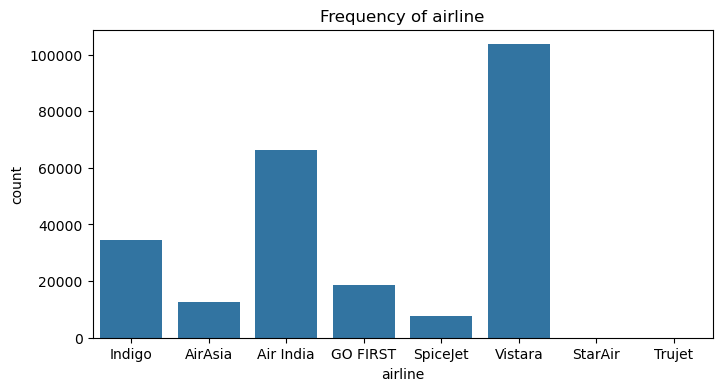

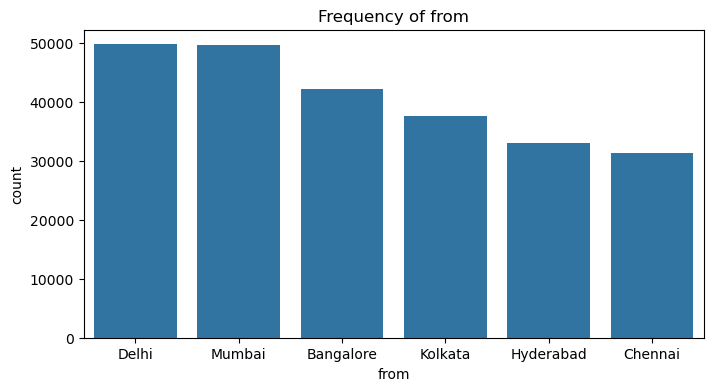

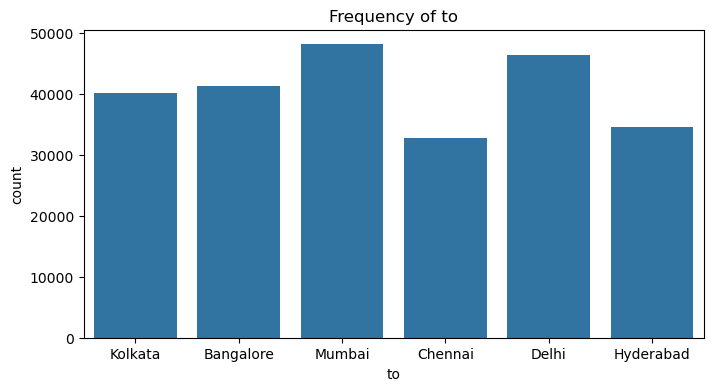

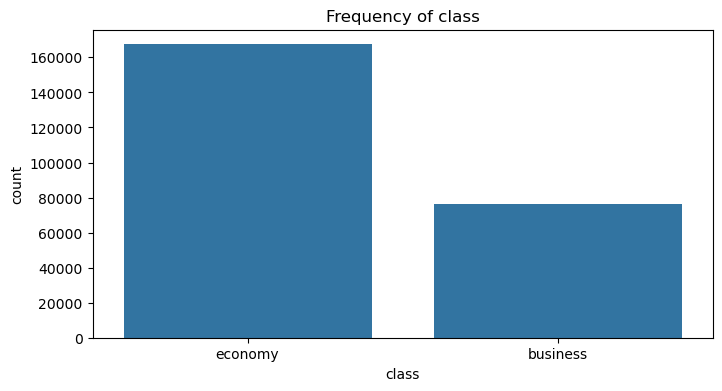

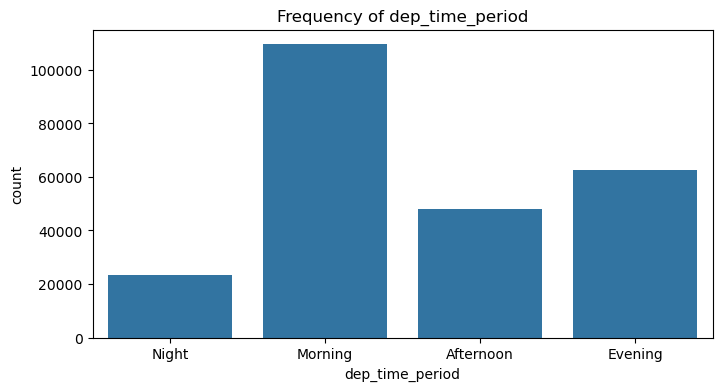

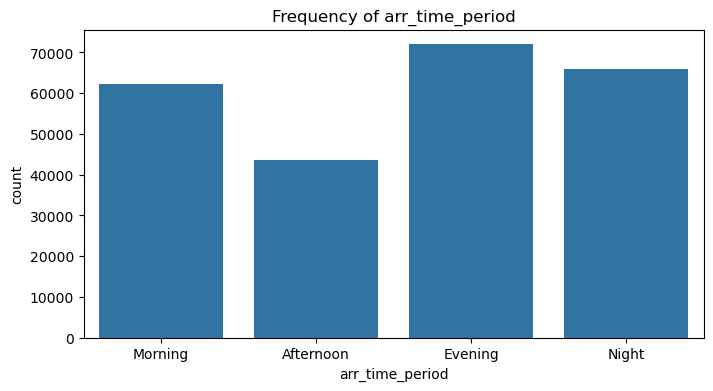

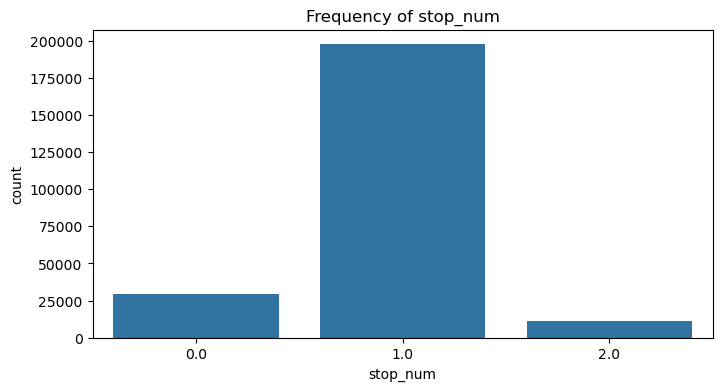

In [41]:
## 2-1 범주형 변수 분석
# 범주형 변수중 id, ch_code, num_code를 제외한 나머지 변수 분석
# 분산분석을 통해 범주형 변수의 영향력을 확인
categorical_vars = ['airline', 'from','to', 'class', 'dep_time_period', 'arr_time_period', 'stop_num']

# 각 범주형 변수의 빈도수 시각화
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Frequency of {var}')
    plt.show()

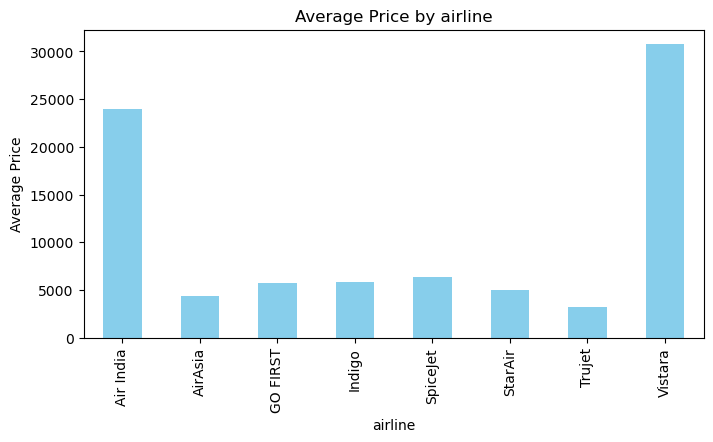

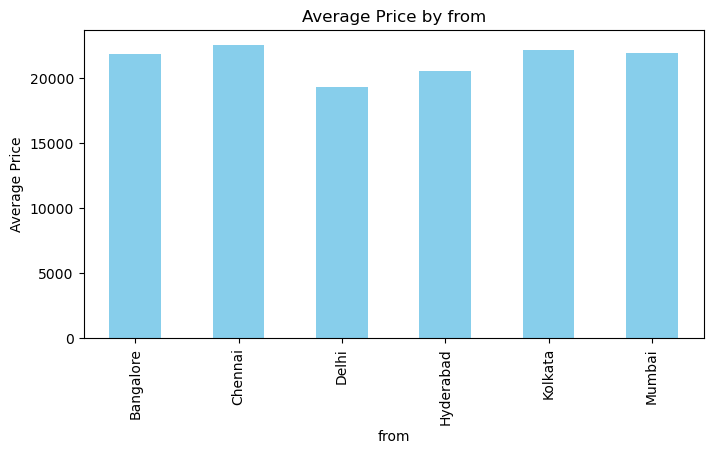

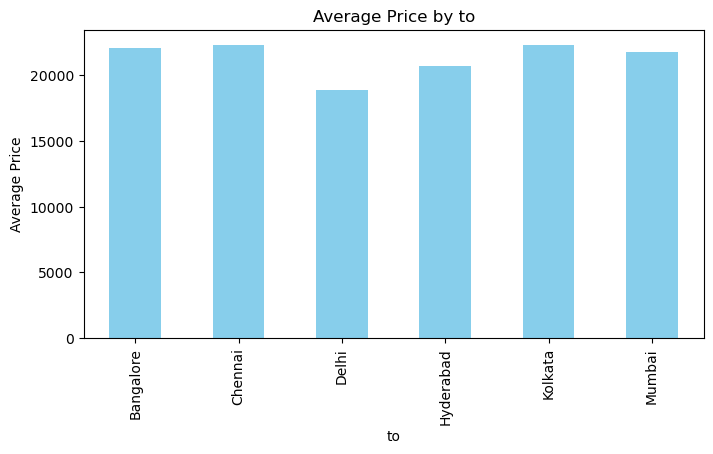

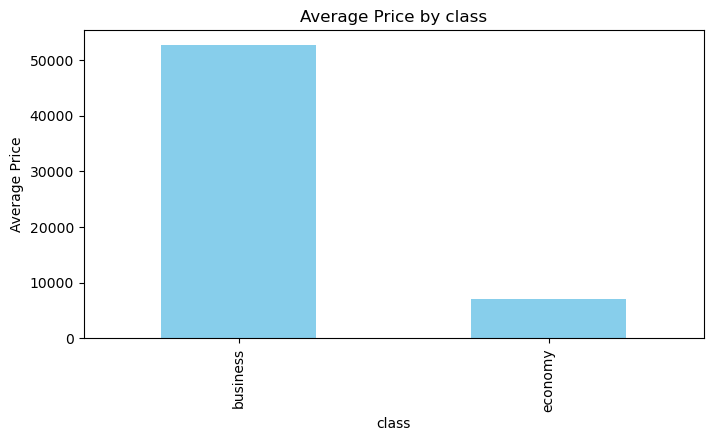

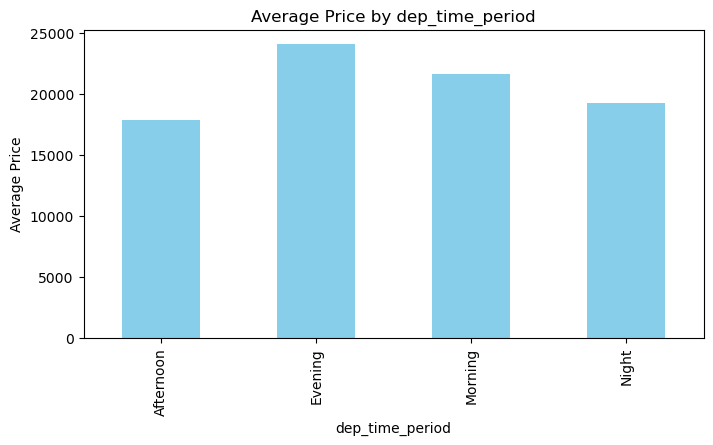

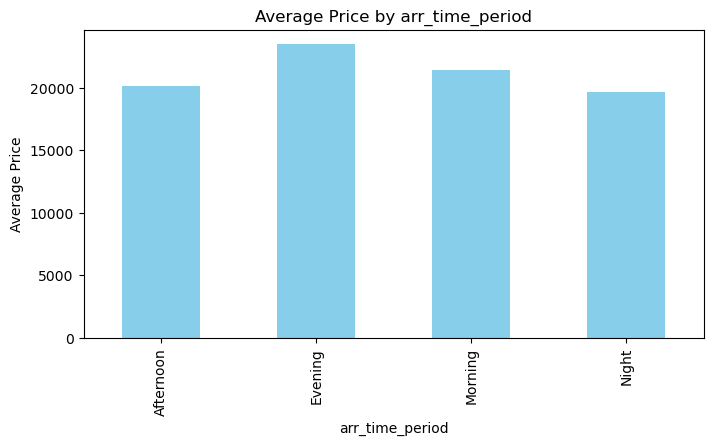

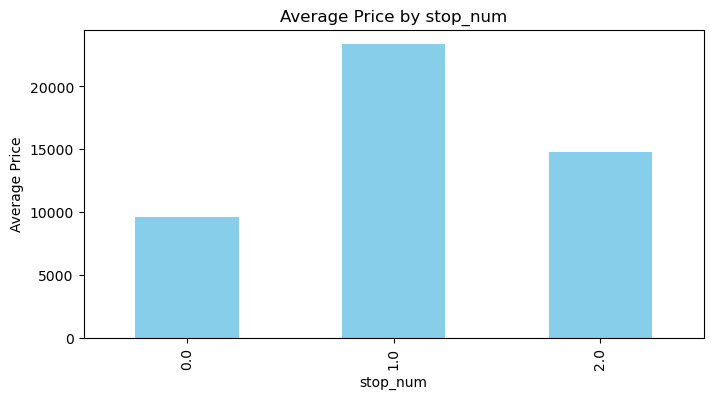

In [42]:
# 각 범주형 변수에 따라 price의 평균을 계산하고 시각화
for var in categorical_vars:
    mean_price_by_category = df.groupby(var)['price'].mean()
    plt.figure(figsize=(8, 4))
    mean_price_by_category.plot(kind='bar', color='skyblue', figsize=(8, 4))
    plt.title(f'Average Price by {var}')
    plt.ylabel('Average Price')
    plt.show()


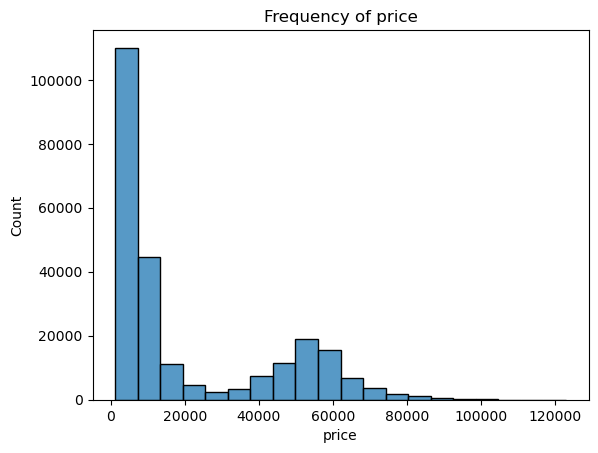

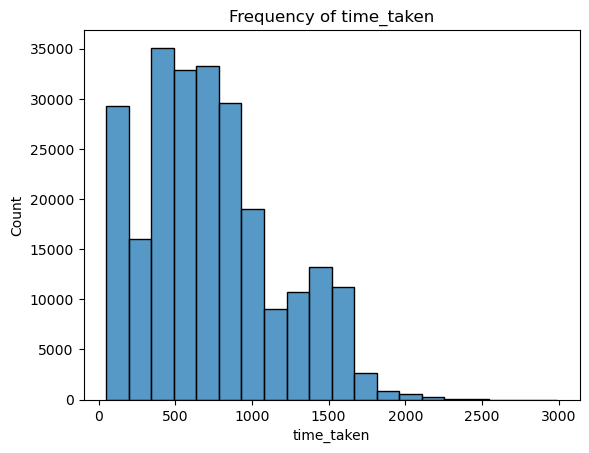

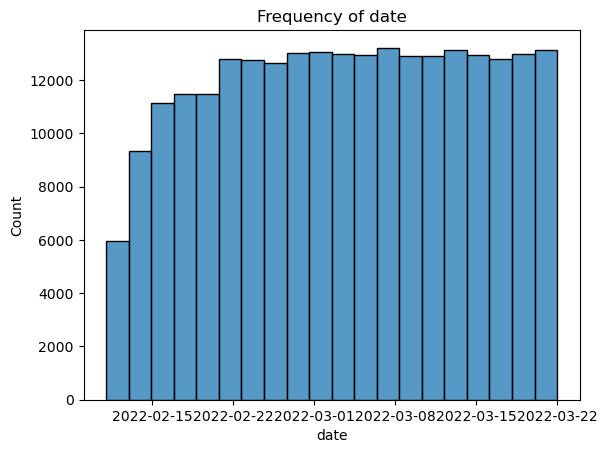

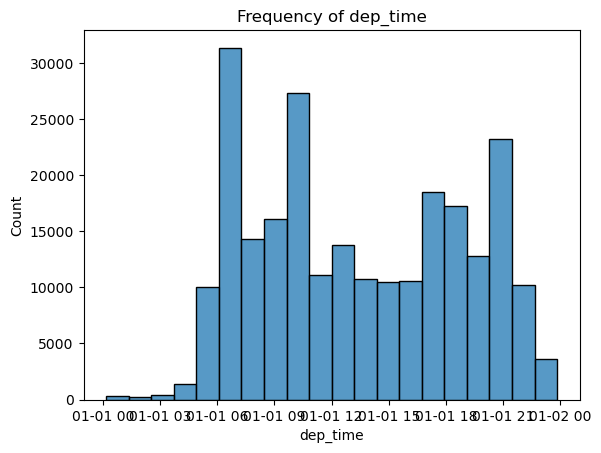

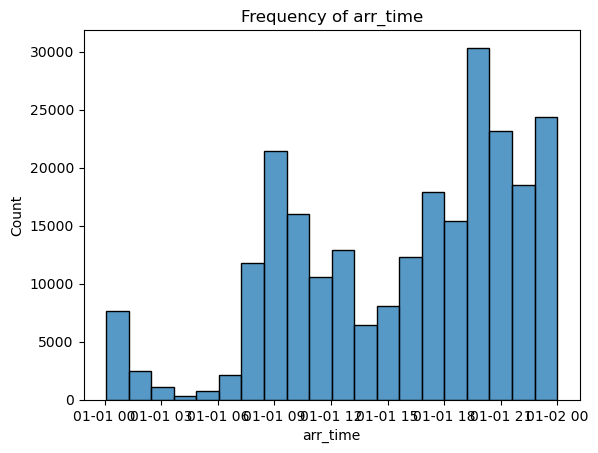

In [54]:
## 2-2 수치형 변수 분석
numeric_vars = ['price', 'time_taken', 'date', 'dep_time', 'arr_time']

for var in numeric_vars:
    sns.histplot(df[var], bins=20)  # bins 값을 조절
    plt.title(f'Frequency of {var}')
    plt.show()


두 수치형 데이터의 분산 모두 오른쪽 길이가 긴 데이터로, 로그 변환하여 분석할 수 있다. 
또한 개형이 상당히 유사한 형태를 보인다. 

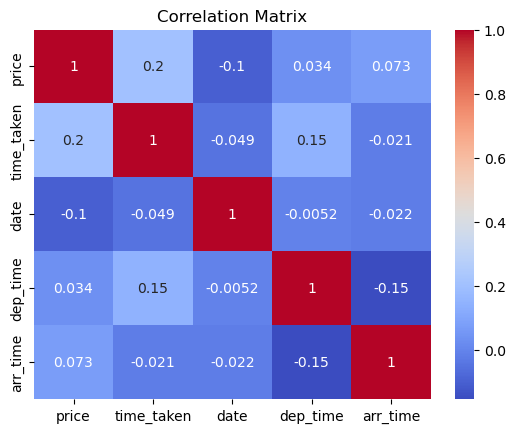

In [55]:
corr_matrix = df[numeric_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
df.to_csv('train_mod.csv', index=True)

# step 2. baseline model

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


In [93]:
train_data = pd.read_csv('train_mod.csv')
df = pd.DataFrame(train_data)

cat_predictors = ['airline', 'from', 'to', 'class', 'dep_time_period', 'arr_time_period', 'stop_num']
num_predictors = ['time_taken', 'days_since']

X_cat = pd.get_dummies(df[cat_predictors], drop_first=True)
X_num = df[num_predictors]

X = pd.concat([X_num, X_cat], axis=1)
y = df['price']



In [110]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, train_data['price'], test_size=0.2, random_state=10)

[Text(0.5, 0.875, 'class_economy <= 0.5\nsquared_error = 514749805.902\nsamples = 194830\nvalue = 21305.448'),
 Text(0.25, 0.625, 'time_taken <= 272.5\nsquared_error = 171657409.564\nsamples = 60929\nvalue = 52767.505'),
 Text(0.125, 0.375, 'time_taken <= 122.5\nsquared_error = 47451022.087\nsamples = 5489\nvalue = 27988.341'),
 Text(0.0625, 0.125, 'squared_error = 12677044.535\nsamples = 985\nvalue = 20617.289'),
 Text(0.1875, 0.125, 'squared_error = 40575132.362\nsamples = 4504\nvalue = 29600.349'),
 Text(0.375, 0.375, 'airline_Vistara <= 0.5\nsquared_error = 117144415.822\nsamples = 55440\nvalue = 55220.839'),
 Text(0.3125, 0.125, 'squared_error = 60360704.024\nsamples = 19478\nvalue = 49806.108'),
 Text(0.4375, 0.125, 'squared_error = 123418770.744\nsamples = 35962\nvalue = 58153.605'),
 Text(0.75, 0.625, 'days_since <= 14.5\nsquared_error = 15497348.822\nsamples = 133901\nvalue = 6989.262'),
 Text(0.625, 0.375, 'time_taken <= 267.5\nsquared_error = 18223485.711\nsamples = 43864\nv

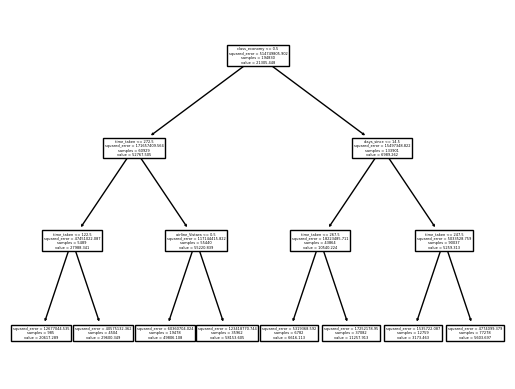

In [111]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots()[1]
plot_tree(reg, ax=ax, feature_names=X.columns)

In [112]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [98]:
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

35063620.29770017

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = G.predict(X_test)

mse = mean_squared_error(y_test, y_pred)   # 평균 제곱 오차 (MSE)
rmse = np.sqrt(mse)                        # 평균 제곱근 오차 (RMSE)
mae = mean_absolute_error(y_test, y_pred)

array([ 5604.19952007,  3159.04997246,  5604.19952007, ...,
       58183.70876589, 58183.70876589,  5604.19952007])

In [113]:
import pandas as pd
import numpy as np

# 테스트 데이터 불러오기
test_data = pd.read_csv('./gist-mldl24f-hw3/test.csv')

# 날짜와 시간 데이터 전처리
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['num_code'] = test_data['num_code'].astype(str)

# 시간 변환 함수 정의
def convert_time_to_minutes(time_str):
    try:
        hours, minutes = time_str.split('h')
        hours = float(hours.strip())
        minutes = int(minutes.replace('m', '').strip())
        total_minutes = int(hours * 60) + minutes
        return total_minutes
    except ValueError:
        return np.nan

test_data['time_taken'] = test_data['time_taken'].apply(convert_time_to_minutes)

# 출발 및 도착 시간 전처리
test_data['dep_time'] = pd.to_datetime(test_data['dep_time'], format='%H:%M')
test_data['arr_time'] = pd.to_datetime(test_data['arr_time'], format='%H:%M')

# 시간대를 범주형으로 추가
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

test_data['dep_time_period'] = test_data['dep_time'].dt.hour.apply(time_of_day)
test_data['arr_time_period'] = test_data['arr_time'].dt.hour.apply(time_of_day)

# stop 정보를 숫자로 변환
test_data['stop_num'] = test_data['stop'].map({
    'non-stop': 0,
    '1-stop': 1,
    '2+-stop': 2
})

# 기준 날짜로부터의 경과 일수 추가
reference_date = pd.to_datetime('2022-02-11')
test_data['days_since'] = (pd.to_datetime(test_data['date']) - reference_date).dt.days

# test_mod.csv로 저장
test_data.to_csv('test_mod.csv', index=False)

# One-Hot Encoding을 위한 범주형 변수 목록
cat_predictors = ['airline', 'from', 'to', 'class', 'dep_time_period', 'arr_time_period']

# 테스트 데이터 로드 및 One-Hot Encoding
test_data = pd.read_csv('test_mod.csv')
X_test = pd.get_dummies(test_data[cat_predictors + ['stop_num', 'days_since']], drop_first=True)

# 학습 데이터와 열 맞추기
X_train_columns = G.best_estimator_.feature_names_in_  # 학습된 모델의 열 정보 가져오기
X_test = X_test.reindex(columns=X_train_columns, fill_value=0)

# 예측 수행
y_pred = G.predict(X_test)

# 결과 DataFrame 생성
result = pd.DataFrame({'id': test_data['id'], 'Predicted_Price': y_pred})

# CSV 파일로 저장
result.to_csv('predicted_prices.csv', index=False)
print("predicted_prices.csv 파일이 생성되었습니다.")


predicted_prices.csv 파일이 생성되었습니다.


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243538 entries, 0 to 243537
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          243538 non-null  object
 1   date        243538 non-null  object
 2   airline     243538 non-null  object
 3   ch_code     243538 non-null  object
 4   num_code    243538 non-null  int64 
 5   dep_time    243538 non-null  object
 6   from        243538 non-null  object
 7   time_taken  243538 non-null  object
 8   stop        243538 non-null  object
 9   arr_time    243538 non-null  object
 10  to          243538 non-null  object
 11  class       243538 non-null  object
 12  price       243538 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 24.2+ MB
